
# Simple Linear Regression Example Homework 2 

This simple linear regression example uses the `boston` dataset from sklearn. Only one feature is used in order to illustrate a two-dimensional plot of this regression technique. The local version of the plot is somehow messy but the online version is clear, however then I can't save it. Not sure what is wrong. 

Homework assignment stipulates to impute missing data but a quick check is run and there isn't any. It's unclear if we were supposed to go through the exercise to create the voids and then refill them.


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Load Boston dataset
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.data.shape)

In [ ]:
type(boston) # it's a bunch

In [ ]:
boston.keys()

In [ ]:
boston.feature_names

In [ ]:
print(boston.DESCR)

Create a Pandas dataframe with feature names as the column names. 

In [ ]:
df = pd.DataFrame(boston.data, columns = boston.feature_names)
df.head()

Need to add the column for target output

In [ ]:
boston.target

Add a new column for output in the dataframe

In [ ]:
df['output'] = boston.target
df.head()

Check if there is any undefined NaN values 

In [ ]:
df.isnull().sum()  # checked for nulls but there aren't any

In [ ]:
corr_matrix = df.corr()
corr_matrix["output"].sort_values(ascending=False)

Now select only one feature that is most correlated to the output

In [ ]:
df1 = df[['RM','output']]  # or df1 = df.loc[:,['bmi','output']]
df1.head()

Split the data into trainning set and tet set

In [ ]:
# drop the output column
X = df1.drop('output', axis = 1)
# select only the output column and make a copy 
y = df1['output'].copy()

In [ ]:
type(X)

In [ ]:
type(y)

In [ ]:
boston_X_train, boston_X_test, boston_y_train, boston_y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print(boston_X_train.shape)
print(boston_X_test.shape)
print(boston_y_train.shape)
print(boston_y_test.shape)

Create linear regression model object

In [ ]:
regr = linear_model.LinearRegression()

Train the model using the training set

In [ ]:
regr.fit(boston_X_train, boston_y_train)

In [ ]:
# The coefficients
print('Coefficients: \n', regr.coef_)

Make predictions using the testing set

In [ ]:
boston_y_pred = regr.predict(boston_X_test)

Plot the straight line produced by the model with the test data 

In [ ]:
plt.scatter(boston_X_test, boston_y_test,  color='black')
plt.plot(boston_X_test, boston_y_pred, color='blue', linewidth=3)
plt.show()

### I get a straight line when I do this online! But when I download to local it gives me the above mess. This below is just an image of the online version. Not sure what is wrong. I can't find any typo.

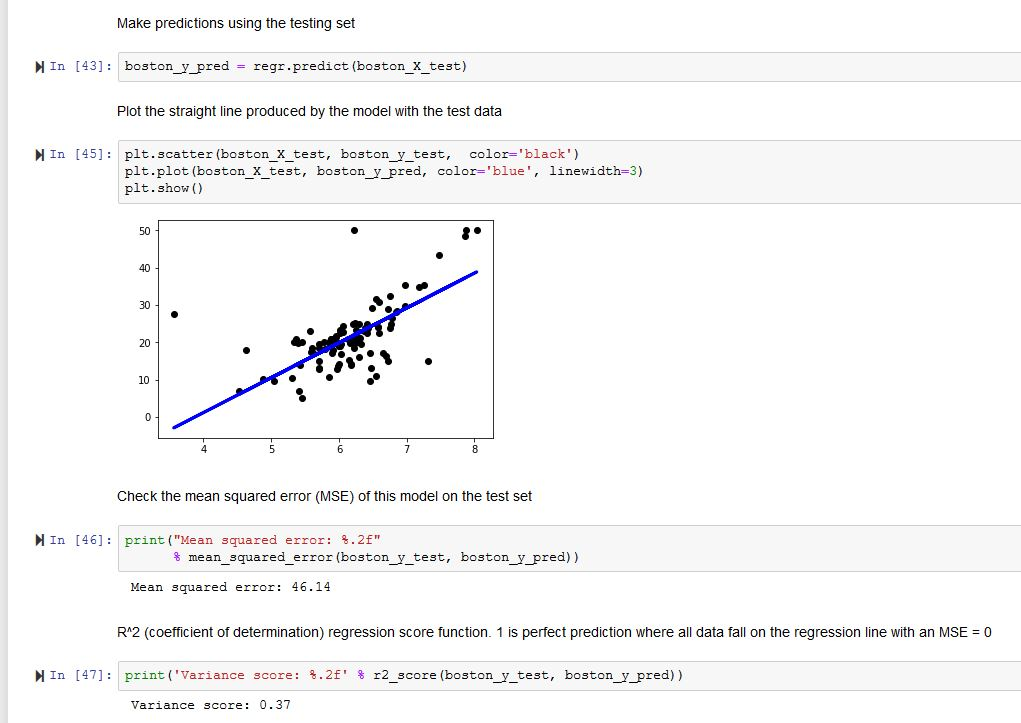

Check the mean squared error (MSE) of this model on the test set 

In [ ]:
print("Mean squared error: %.2f"
      % mean_squared_error(boston_y_test, boston_y_pred))

R^2 (coefficient of determination) regression score function.
1 is perfect prediction where all data fall on the regression line with an MSE = 0 

In [ ]:
print('Variance score: %.2f' % r2_score(boston_y_test, boston_y_pred))